<a href="https://colab.research.google.com/github/jenelaineDC/DSML-PROJECTS/blob/main/Online%20Retail/Online_Retail_Analytics_K_Means_Clustering_%26_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BACKGROUND

In today’s competitive e-commerce environment, many small online retailers and new entrants face challenges in adopting data-driven strategies for customer retention and growth. While customer-centric marketing and data mining are increasingly critical, businesses often lack the technical expertise to implement these practices effectively.

This project uses the Online Retail II dataset, which contains transactional records from a UK-based non-store retailer that primarily sells unique all-occasion giftware between December 2009 and December 2011. Many of the company’s customers are wholesalers, making it important to understand both individual and bulk-buying behaviors.

By leveraging data science techniques, this project aims to uncover actionable insights into customer behavior and product purchasing patterns. The analysis focuses on customer segmentation through the RFM (Recency, Frequency, Monetary) model using K-Means clustering, as well as Market Basket Analysis (MBA) using the Apriori algorithm. Together, these approaches provide a foundation for customer relationship management (CRM), targeted marketing, inventory optimization, and cross-selling strategies.


### PROJECT GOAL

The main goals of this project are:
- Customer Segmentation (K-Means with RFM): The project aims to segment customers into meaningful groups to support targeted marketing and CRM strategies. By analyzing recency, frequency, and monetary values, we can identify loyal customers, at-risk customers, and other groups that allow for tailored engagement and more effective retention strategies.

- Product & Sales Insights: Another key objective is to analyze product and sales performance. This includes identifying top-selling products to guide inventory planning and pricing adjustments, detecting return/refund trends that may negatively impact sales, and uncovering seasonality and revenue patterns across time periods and countries to better understand customer demand.

- Market Basket Analysis (MBA): Finally, the project applies the Apriori algorithm to discover associations between products frequently purchased together. These insights can be leveraged to design cross-selling and upselling strategies, as well as to inform product recommendation systems that enhance the overall customer experience.

### SCOPE AND LIMITATION
The project will:
- Use the Online Retail II dataset (2009–2011), focusing only on the variables provided.
- Perform customer segmentation using RFM modeling combined with K-Means clustering.
- Conduct Market Basket Analysis (MBA) with the Apriori algorithm to identify product affinities and purchasing patterns.

The project will not:
- Incorporate external data sources such as competitor activity or macroeconomic conditions.
- Generalize findings beyond this specific retailer, as results are limited to a single dataset.
- Deploy models into production; instead, it will focus on generating insights and analytical frameworks for potential business use.
- Capture all product categories or customer behaviors, since the dataset is time-bound and may not fully represent long-term patterns.



#### SET-UP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/DSML PROJECTS/Online Retail

/content/drive/MyDrive/DSML PROJECTS/Online Retail


In [3]:
# for operational packages
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for column display
pd.set_option('display.max_columns', None)

# for unsupervised learning modeling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

### DATA DEVELOPMENT PROCESS

#### Data Source

The Online Retail II dataset contains 541,909 transaction records from a UK-based and registered non-store online retailer, covering the period between 01/12/2009 and 09/12/2011. The company primarily sells unique, all-occasion giftware, with a significant portion of its customers being wholesalers.

[UC Irvene Machine Learning Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

| Variable     | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| InvoiceNo    | Unique invoice number (6-digit). If it starts with 'C', it indicates a cancellation. |
| StockCode    | Unique product (item) code (5-digit) assigned to each distinct product.      |
| Description  | Name of the product (item).                                                  |
| Quantity     | Number of units of the product per transaction. Numeric.                     |
| InvoiceDate  | Date and time when the transaction was generated.                            |
| UnitPrice    | Unit price of the product in sterling (£). Numeric.                          |
| CustomerID   | Unique customer identifier (5-digit).                                        |
| Country      | Name of the country where the customer resides.                              |


In [4]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [5]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [8]:
df.describe(include = 'O')

InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

             InvoiceDate         Country  
count             541909          541909  
unique             23260              38  
top     10/31/2011 14:41  United Kingdom  
freq                1114          495478

#### Data Preprocessing

##### Missing Values CustomerID & Description

In [9]:
# Count missing Values per column
df.isna().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
StockCode           0
InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [10]:
df[df['CustomerID'].isna()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kingdom  
1443    12/1/2010 14:32       2.51         NaN  United Kingdom  
1444    12/1/2010 14:32       2.51         NaN  United Kingdom  
1445    12/1/2010 14:32       0.85         NaN  United Kingdom  
1446    12/1/2010 14:32       1.66         NaN  United Kingdom  
...                 ...        ...         ...             ...  
541536  12/9/2011 10:26       4.13         NaN  United Kingdom  
541537  12/9/2011 10:26       4.13         NaN  United Kingdom  
541538  12/9/2011 10:26       4.96         NaN  United Kingdom  
541539  12/9/2011 10:26      10.79         NaN  United Kingdom  
541540  12/9/2011 10:26    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [11]:
df[df['Description'].isna()]

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
535322    581199     84581         NaN        -2  12/7/2011 18:26        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/2011 14:06        0.0   

        CustomerID         Country  
622            NaN  United Kingdom  
1970           NaN  United Kingdom  
1971           NaN  United Kingdom  
1972           NaN  United Kingdom  
1987           NaN  United Kingdom  
...            ...             ...  
535322         NaN  United Kingdom  
535326         NaN  United Kingdom  
535332         NaN  United Kingdom  
536981         NaN  United Kingdom  
538554         NaN  United Kingdom  

[1454 rows x 8 columns]

In [12]:
df[(df['Description'].isna()) & (df['CustomerID'].isna())]
print('No of Na in Description: ', df[df['Description'].isna()].shape[0])
print('No of Na in both Description and Customer ID: ', df[(df['Description'].isna()) & (df['CustomerID'].isna())].shape[0])
print('No of Na in Description and UnitPrice equal 0: ', df[(df['Description'].isna()) & (df['UnitPrice'] == 0)].shape[0])

No of Na in Description:  1454
No of Na in both Description and Customer ID:  1454
No of Na in Description and UnitPrice equal 0:  1454


##### Datetime Format: InvoiceDate

In [13]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

##### Negative Values: Quantity and UnitPrice

- For column `Quantity` there is an observed 10624 rows of negative values. Consequently, the Invoice No started with letter C. Based on the dataset description the C pertains to order cancellation. Upon checking we have 9288 cancelled transaction and all of this cancelled transaction have negative quantities.

- There are only two entries with negative `UnitPrice`. However, its invoice number starts with A with a stockcode of B. In our datacard stockcode is a 5 digit number.

In [15]:
# Check data with negative Quantity
df[df['Quantity'] < 0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[10624 rows x 8 columns]

In [16]:
print('No of Cancelled Transaction: ', df[df["InvoiceNo"].str.startswith("C")].shape[0])
print('No of Cancelled Transaction with Negative Quantities: ', df[df["InvoiceNo"].str.startswith("C")][df['Quantity'] < 0].shape[0])

No of Cancelled Transaction:  9288
No of Cancelled Transaction with Negative Quantities:  9288


/tmp/ipython-input-1677812694.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('No of Cancelled Transaction with Negative Quantities: ', df[df["InvoiceNo"].str.startswith("C")][df['Quantity'] < 0].shape[0])


In [17]:
# Check data with negative UnitPrice
df[df['UnitPrice'] < 0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [18]:
df[df['UnitPrice'] == 0]

InvoiceNo StockCode                   Description  Quantity  \
622       536414     22139                           NaN        56   
1970      536545     21134                           NaN         1   
1971      536546     22145                           NaN         1   
1972      536547     37509                           NaN         1   
1987      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
536981    581234     72817                           NaN        27   
538504    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                           NaN        20   
538919    581422     23169                       smashed      -235   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00        0.0         NaN  United Kingdom  
1970   2010-12-01 14:32:00        0.0         NaN  United Kingdom  
1971   2010-12-01 14:33:00        0.0         NaN  United Kingdom  
1972   2010-12-01 14:33:00        0.0         NaN  United Kingdom  
1987   2010-12-01 14:34:00        0.0         NaN  United Kingdom  
...                    ...        ...         ...             ...  
536981 2011-12-08 10:33:00        0.0         NaN  United Kingdom  
538504 2011-12-08 13:58:00        0.0         NaN  United Kingdom  
538505 2011-12-08 13:58:00        0.0         NaN  United Kingdom  
538554 2011-12-08 14:06:00        0.0         NaN  United Kingdom  
538919 2011-12-08 15:24:00        0.0         NaN  United Kingdom  

[2515 rows x 8 columns]

In [19]:
df[(df['UnitPrice'] == 0) & (df['CustomerID'].isna())]

InvoiceNo StockCode                   Description  Quantity  \
622       536414     22139                           NaN        56   
1970      536545     21134                           NaN         1   
1971      536546     22145                           NaN         1   
1972      536547     37509                           NaN         1   
1987      536549    85226A                           NaN         1   
...          ...       ...                           ...       ...   
536981    581234     72817                           NaN        27   
538504    581406    46000M  POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S  POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                           NaN        20   
538919    581422     23169                       smashed      -235   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00        0.0         NaN  United Kingdom  
1970   2010-12-01 14:32:00        0.0         NaN  United Kingdom  
1971   2010-12-01 14:33:00        0.0         NaN  United Kingdom  
1972   2010-12-01 14:33:00        0.0         NaN  United Kingdom  
1987   2010-12-01 14:34:00        0.0         NaN  United Kingdom  
...                    ...        ...         ...             ...  
536981 2011-12-08 10:33:00        0.0         NaN  United Kingdom  
538504 2011-12-08 13:58:00        0.0         NaN  United Kingdom  
538505 2011-12-08 13:58:00        0.0         NaN  United Kingdom  
538554 2011-12-08 14:06:00        0.0         NaN  United Kingdom  
538919 2011-12-08 15:24:00        0.0         NaN  United Kingdom  

[2475 rows x 8 columns]

##### Invoice

Based on the data desription, the Invoice number is a unique 6 digit code, however we want to check if there are other unique values present in the data.
    
    - C pertains to Cancellation.
    - A might be accounting adjustment.

In [20]:
df["InvoiceNo"] = df["InvoiceNo"].astype("str")
df[df["InvoiceNo"].str.match("^\\d{6}$") == False]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[9291 rows x 8 columns]

In [21]:
df["InvoiceNo"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [22]:
df[df["InvoiceNo"].str.startswith("A")]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299982   A563185         B  Adjust bad debt         1 2011-08-12 14:50:00   
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299982   11062.06         NaN  United Kingdom  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

##### Stockcode
Based on the data description, the Stock code is a unique 5 digit number. However we are observing values that does not conform to this 5 digit number. There are 33 other stockcode format.

In [23]:
# Convert Stockcode to String
df["StockCode"] = df["StockCode"].astype("str")

# Display data that does not conform with the 5 digit value
df[(df["StockCode"].str.match("^\\d{5}$") == False)]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
45        536370      POST                              POSTAGE         3   
...          ...       ...                                  ...       ...   
541778    581578    84997C      CHILDRENS CUTLERY POLKADOT BLUE         8   
541809    581579    85099C       JUMBO  BAG BAROQUE BLACK WHITE        10   
541838    581580    84993A            75 GREEN PETIT FOUR CASES         2   
541844    581580    85049A        TRADITIONAL CHRISTMAS RIBBONS         1   
541853    581580    85049E            SCANDINAVIAN REDS RIBBONS         2   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
45     2010-12-01 08:45:00      18.00     12583.0          France  
...                    ...        ...         ...             ...  
541778 2011-12-09 12:16:00       4.15     12713.0         Germany  
541809 2011-12-09 12:19:00       1.79     17581.0  United Kingdom  
541838 2011-12-09 12:20:00       0.42     12748.0  United Kingdom  
541844 2011-12-09 12:20:00       1.25     12748.0  United Kingdom  
541853 2011-12-09 12:20:00       1.25     12748.0  United Kingdom  

[54873 rows x 8 columns]

In [24]:
# Show unique values of Stockcode
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

# The regex function after the ampersand looks for value with letters from small a-z and capital a-z.
# The + sign indicates that more than one letter can exist

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [25]:
otherstockcode = ['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK']

In [26]:
# Check description of the other stockcode
df[df['StockCode'].isin(otherstockcode)].drop_duplicates(subset='StockCode', keep='first')[['StockCode', 'Description']]

StockCode                         Description
45              POST                             POSTAGE
141                D                            Discount
1423              C2                            CARRIAGE
1814             DOT                      DOTCOM POSTAGE
2239               M                              Manual
4406    BANK CHARGES                        Bank Charges
14436              S                             SAMPLES
14514      AMAZONFEE                          AMAZON FEE
21326       DCGS0076        SUNJAR LED NIGHT NIGHT LIGHT
24906       DCGS0003                 BOXED GLASS ASHTRAY
38248   gift_0001_40  Dotcomgiftshop Gift Voucher £40.00
40052       DCGS0070               CAMOUFLAGE DOG COLLAR
40383              m                              Manual
42057   gift_0001_50  Dotcomgiftshop Gift Voucher £50.00
44725   gift_0001_30  Dotcomgiftshop Gift Voucher £30.00
44794   gift_0001_20  Dotcomgiftshop Gift Voucher £20.00
74825       DCGS0055                                 NaN
74838       DCGS0072                                 NaN
74839       DCGS0074                                 NaN
75053       DCGS0069               OOH LA LA DOGS COLLAR
75295       DCGS0057                                 NaN
84016       DCGSSBOY                      BOYS PARTY BAG
84017      DCGSSGIRL                     GIRLS PARTY BAG
112442  gift_0001_10  Dotcomgiftshop Gift Voucher £10.00
157195          PADS          PADS TO MATCH ALL CUSHIONS
170783      DCGS0004          HAYNES CAMPER SHOULDER BAG
279251      DCGS0073                                ebay
279252      DCGS0071                                 NaN
279255      DCGS0068                                ebay
279256      DCGS0067                                ebay
279257     DCGS0066P                                 NaN
299982             B                     Adjust bad debt
317508          CRUK                     CRUK Commission

##### Data Cleaning

- [X] Drop Cancelled Transaction based on column `InvoiceNo` which starts with letter C and letter A
- [X] Drop NA values in column `Description` and `CustomerID`
- [X] Drop negative values and zero values in column `Quantity`
- [X] Drop negative values and zero values in column `UnitPrice`
- [X] Remove duplicate entries
- [X] Remove rows with `Stockcode` equal to PADS

In [27]:
# Drop invoiceno that starts with C and A
df = df[df['InvoiceNo'].str.match("^\\d{6}$") == True]

In [28]:
# Drop missing values in Description and Customer ID
df.dropna(subset = ['Description', 'CustomerID'], inplace = True)

In [29]:
# Drop negative and zero values in Quantity
df = df[df['Quantity'] > 0]

In [30]:
# Drop negative and zero values in UnitPrice
df = df[df['UnitPrice'] > 0]

In [31]:
# Remove rows with StockCode == PADS
df = df[df['StockCode'] != 'PADS']

In [32]:
#Count number of duplicate entries
print('No of duplicated entries: ', df.duplicated().sum())

#Remove duplicate entries
df = df.drop_duplicates(keep='first')

No of duplicated entries:  5192


### RFM: Recency, Frequency, Monetary

- [ ] Create new column `TotalPrice` by multiplying `UnitPrice` and `Quantity`
- [ ] Create new dataframe by grouping `CustomerID` and agg function to create columns `Recency`, `Frequency` and `Monetary`
- [ ] Visualize outliers in data through histogram and boxplot. Handle outliers.
- [ ] Plot customer behaviour through 3D Scatter Plot of `Recency`, `Frequency` and `Monetary`

##### Feature Engineering

In [33]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

In [34]:
df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00

In [35]:
agg_df = df.groupby(by='CustomerID').agg(LastPurchased = ('InvoiceDate', 'min'),
                                         Frequency = ( 'InvoiceNo', 'nunique'),
                                         Monetary = ('TotalPrice', 'sum')
                                         ).sort_values(by = 'LastPurchased', ascending = False)
agg_df

LastPurchased  Frequency  Monetary
CustomerID                                         
12713.0    2011-12-09 12:16:00          1    848.55
14569.0    2011-12-08 14:58:00          1    227.39
13298.0    2011-12-08 13:11:00          1    360.00
15520.0    2011-12-08 10:58:00          1    343.50
13436.0    2011-12-08 10:33:00          1    196.89
...                        ...        ...       ...
15100.0    2010-12-01 09:09:00          3    876.00
13748.0    2010-12-01 09:00:00          5    948.25
12583.0    2010-12-01 08:45:00         15   7281.38
13047.0    2010-12-01 08:34:00         10   3237.54
17850.0    2010-12-01 08:26:00         34   5391.21

[4338 rows x 3 columns]

In [36]:
print('Latest: ', agg_df['LastPurchased'].max()) #latest date will be used as reference in calculating the Recency column
print('Oldest: ', agg_df['LastPurchased'].min())

Latest:  2011-12-09 12:16:00
Oldest:  2010-12-01 08:26:00


In [37]:
# Recency = Latest date - Last purchased data
# Recency in number of days
agg_df['Recency'] = (agg_df['LastPurchased'].max() - agg_df['LastPurchased']).dt.days

In [38]:
# Arrange Column to RFM
agg_df = agg_df[['Recency', 'Frequency', 'Monetary']]
agg_df

Recency  Frequency  Monetary
CustomerID                              
12713.0           0          1    848.55
14569.0           0          1    227.39
13298.0           0          1    360.00
15520.0           1          1    343.50
13436.0           1          1    196.89
...             ...        ...       ...
15100.0         373          3    876.00
13748.0         373          5    948.25
12583.0         373         15   7281.38
13047.0         373         10   3237.54
17850.0         373         34   5391.21

[4338 rows x 3 columns]

##### Outlier Handling, Transformation and Scaling

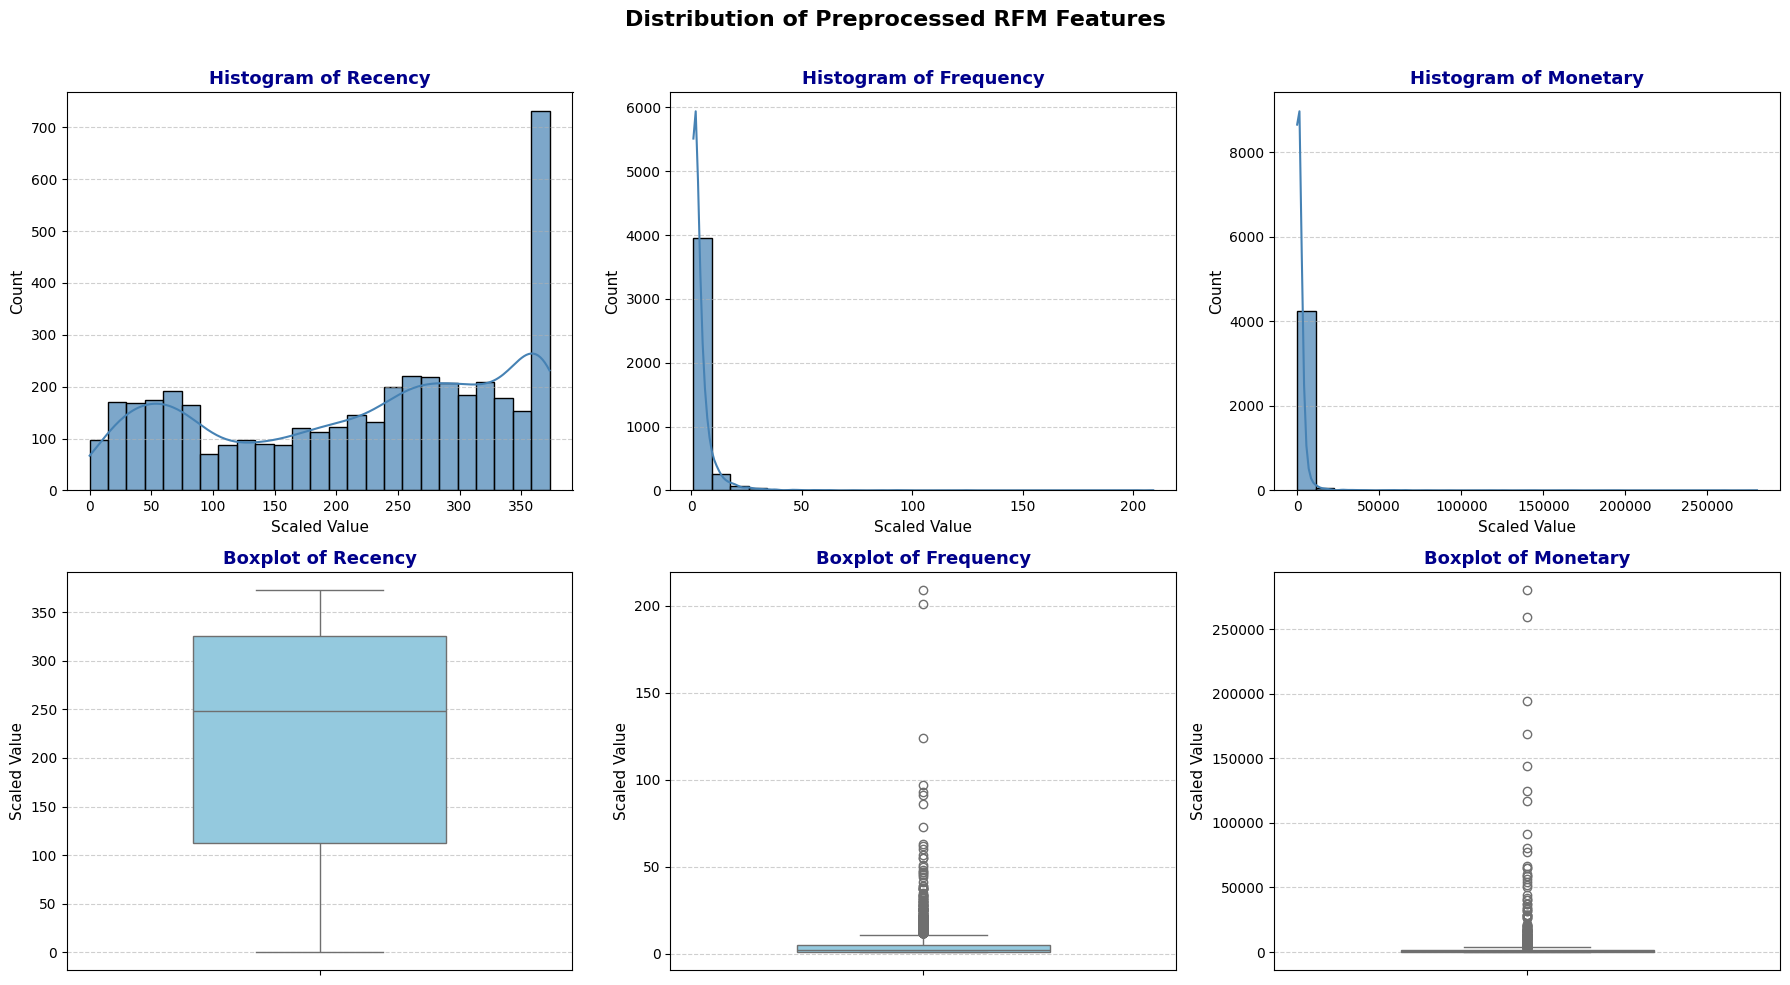

In [39]:
columns = ['Recency', 'Frequency', 'Monetary']

# --- Combined Histograms + Boxplots ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

for i, col in enumerate(agg_df.columns):
    # --- Histogram (row 1) ---
    sns.histplot(agg_df[col], bins=25, kde=True, ax=axes[0, i],
                 color='steelblue', alpha=0.7)
    axes[0, i].set_title(f"Histogram of {col}", fontsize=13, fontweight='bold', color='darkblue')
    axes[0, i].set_xlabel("Scaled Value", fontsize=11)
    axes[0, i].set_ylabel("Count", fontsize=11)
    axes[0, i].grid(axis='y', linestyle='--', alpha=0.6)

    # --- Boxplot (row 2) ---
    sns.boxplot(y=agg_df[col], ax=axes[1, i], color='skyblue', width=0.5)
    axes[1, i].set_title(f"Boxplot of {col}", fontsize=13, fontweight='bold', color='darkblue')
    axes[1, i].set_xlabel("")
    axes[1, i].set_ylabel("Scaled Value", fontsize=11)
    axes[1, i].grid(axis='y', linestyle='--', alpha=0.6)

# Improve spacing
plt.suptitle("Distribution of Preprocessed RFM Features", fontsize=16, fontweight='bold', color='black')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for the suptitle
plt.show()


In [40]:
class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, lower_pct=0.01, upper_pct=0.99):
        self.lower_pct = lower_pct
        self.upper_pct = upper_pct
        self.lower_bounds_ = None
        self.upper_bounds_ = None

    def fit(self, X, y=None):
        # Store bounds for each column
        self.lower_bounds_ = X.quantile(self.lower_pct)
        self.upper_bounds_ = X.quantile(self.upper_pct)
        return self

    def transform(self, X):
        X_capped = X.copy()
        for col in X.columns:
            X_capped[col] = X_capped[col].clip(
                lower=self.lower_bounds_[col],
                upper=self.upper_bounds_[col]
            )
        return X_capped

In [41]:
preprocess_pipeline = Pipeline([
    ("cap_outliers", OutlierCapper(lower_pct=0.00, upper_pct=0.80)),
    ("transform", PowerTransformer(method="yeo-johnson")),
    ("scale", StandardScaler())
])

# Apply preprocessing
rfm_cols = ['Recency', 'Frequency', 'Monetary']
scaled_rfm = preprocess_pipeline.fit_transform(agg_df[rfm_cols])

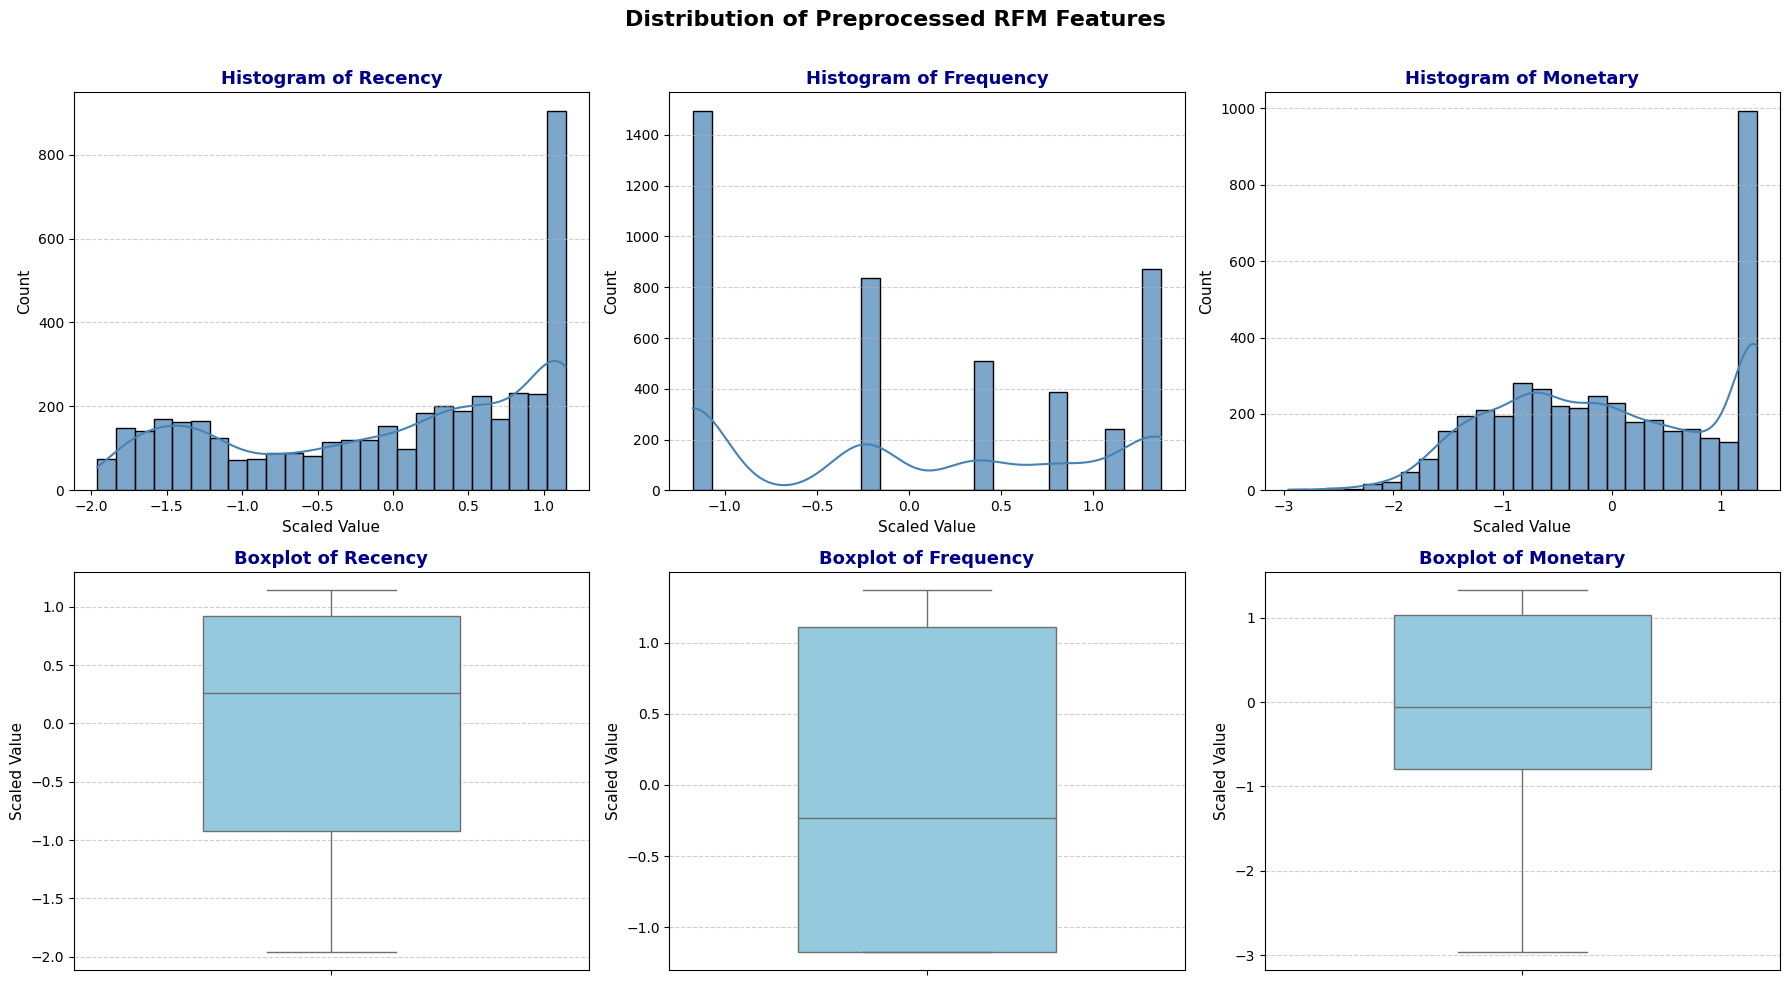

In [42]:
# Convert scaled_rfm back into a DataFrame with column names
scaled_rfm_df = pd.DataFrame(scaled_rfm, columns=rfm_cols)

# --- Combined Histograms + Boxplots ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

for i, col in enumerate(scaled_rfm_df.columns):
    # --- Histogram (row 1) ---
    sns.histplot(scaled_rfm_df[col], bins=25, kde=True, ax=axes[0, i],
                 color='steelblue', alpha=0.7)
    axes[0, i].set_title(f"Histogram of {col}", fontsize=13, fontweight='bold', color='darkblue')
    axes[0, i].set_xlabel("Scaled Value", fontsize=11)
    axes[0, i].set_ylabel("Count", fontsize=11)
    axes[0, i].grid(axis='y', linestyle='--', alpha=0.6)

    # --- Boxplot (row 2) ---
    sns.boxplot(y=scaled_rfm_df[col], ax=axes[1, i], color='skyblue', width=0.5)
    axes[1, i].set_title(f"Boxplot of {col}", fontsize=13, fontweight='bold', color='darkblue')
    axes[1, i].set_xlabel("")
    axes[1, i].set_ylabel("Scaled Value", fontsize=11)
    axes[1, i].grid(axis='y', linestyle='--', alpha=0.6)

# Improve spacing
plt.suptitle("Distribution of Preprocessed RFM Features", fontsize=16, fontweight='bold', color='black')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for the suptitle
plt.show()


##### K-Means Clustering

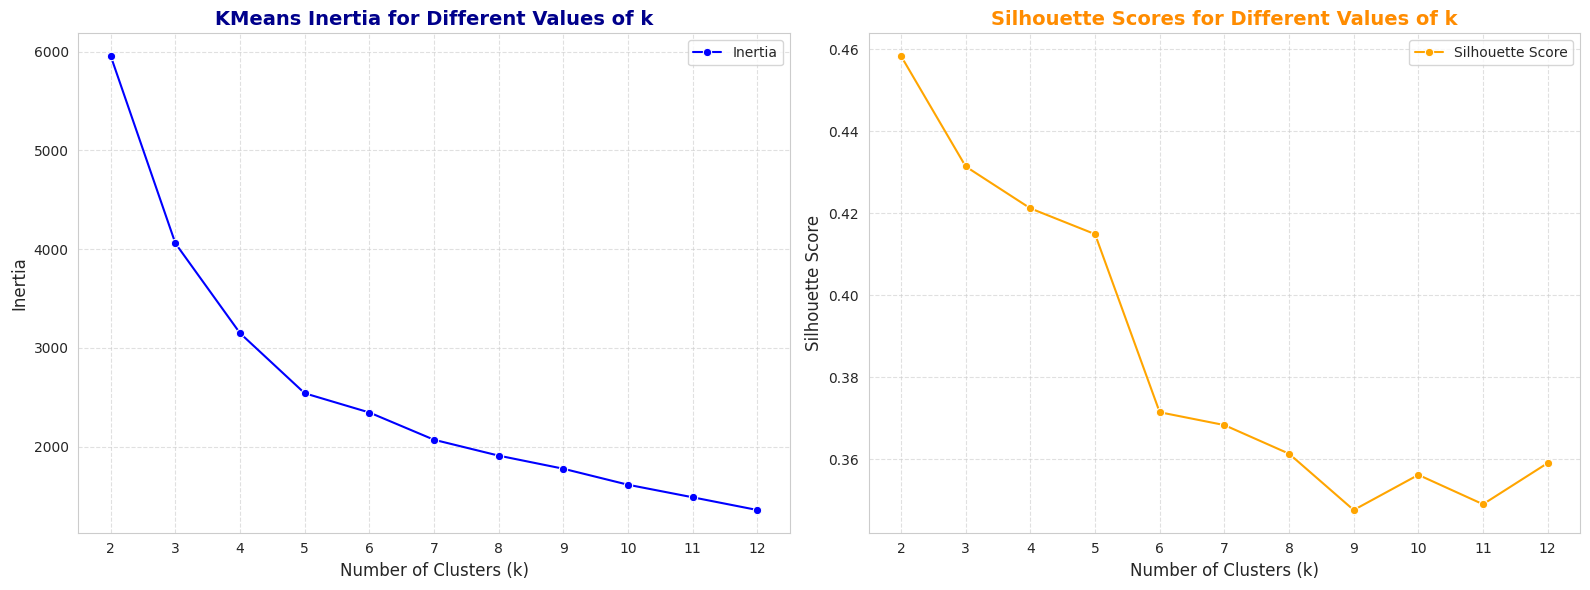

In [43]:
# --- KMeans evaluation ---
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_rfm)

    sil_score = silhouette_score(scaled_rfm, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

# --- Plot results ---
sns.set_style("whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(16, 6))

# Inertia plot
plt.subplot(1, 2, 1)
sns.lineplot(x=k_values, y=inertia, marker='o', color='blue', label='Inertia')
plt.title('KMeans Inertia for Different Values of k', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_values, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Silhouette plot
plt.subplot(1, 2, 2)
sns.lineplot(x=k_values, y=silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores for Different Values of k', fontsize=14, fontweight='bold', color='darkorange')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(k_values, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [44]:
n_clusters = 4

# Fit KMeans with the chosen number of clusters
kmeans_final = KMeans(n_clusters=n_clusters, random_state=42, max_iter=1000)
agg_df['Cluster'] = kmeans_final.fit_predict(scaled_rfm)

# Check cluster sizes
print(agg_df['Cluster'].value_counts())

Cluster
1    1456
0    1131
2    1004
3     747
Name: count, dtype: int64


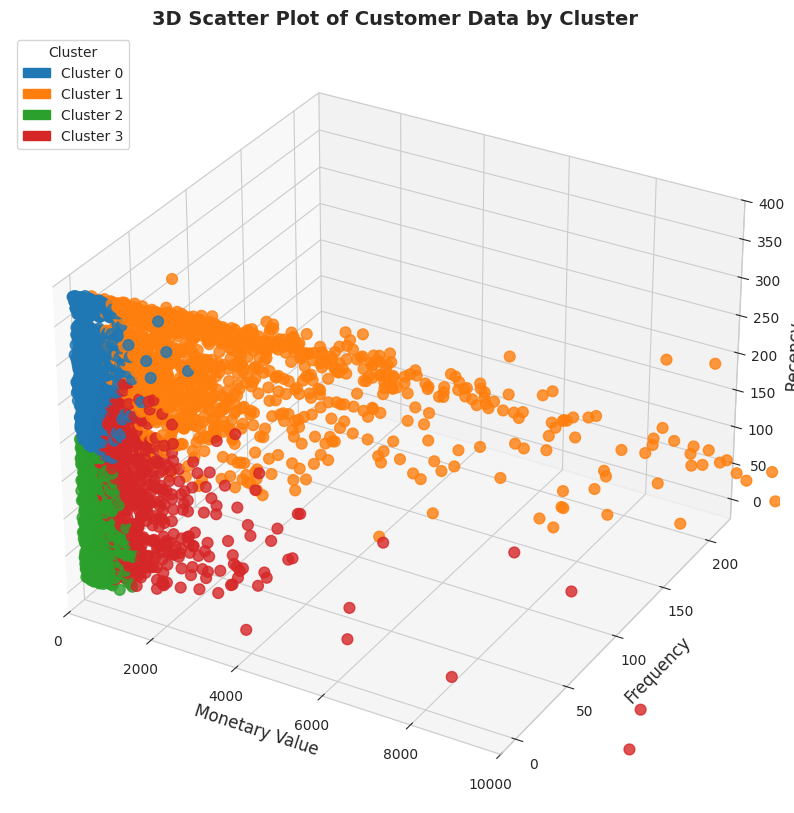

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

# Define cluster colors
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728',  # Red
                 }

# Map colors
colors = agg_df['Cluster'].map(cluster_colors)

# Create 3D scatter
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(agg_df['Monetary'],
                     agg_df['Frequency'],
                     agg_df['Recency'],
                     c=colors,
                     marker='o',
                     s=60,  # slightly larger points
                     alpha=0.8)

# Set axis labels
ax.set_xlabel('Monetary Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Recency', fontsize=12)

# Zoom in on Monetary
ax.set_xlim([0, 10000])

# Set title
ax.set_title('3D Scatter Plot of Customer Data by Cluster', fontsize=14, fontweight='bold')

# Create legend manually
patches = [mpatches.Patch(color=color, label=f'Cluster {cluster}') for cluster, color in cluster_colors.items()]
ax.legend(handles=patches, loc='upper left', title='Cluster')

plt.show()


In [46]:
agg_df.groupby(by = 'Cluster').mean()

Recency  Frequency     Monetary
Cluster                                    
0        286.865606   1.592396   441.056376
1        320.019918   9.105769  4693.559712
2         69.125498   1.157371   316.692819
3        139.445783   3.093708  1655.410442

##### Customer Segmentation Insights & Marketing Strategy Recommendations

Based on the RFM analysis of our customer base, we identified **four distinct segments** with unique purchasing behaviors. Understanding these segments allows us to implement **targeted marketing strategies**, optimize customer engagement, and maximize revenue.

---

**Customer Segment Summary**

| Cluster | Recency (days) | Frequency | Monetary (£) | Segment Insight |
|---------|----------------|----------|--------------|----------------|
| 0       | 287            | 1.6      | 441          | **Dormant / Low-Value Customers**: Inactive customers who purchase infrequently and generate low revenue. |
| 1       | 320            | 9.1      | 4,694        | **High-Value Loyal Customers**: Historically frequent purchasers contributing the highest revenue, but haven’t purchased recently. |
| 2       | 69             | 1.2      | 317          | **New / Recent Customers**: Recently acquired, low purchase frequency, and low monetary value. High potential for growth. |
| 3       | 139            | 3.1      | 1,655        | **Engaged Mid-Value Customers**: Moderate recency, frequency, and monetary value. Likely repeat buyers with potential to become high-value. |

**Interpretation:**  
- **Recency** highlights how long ago customers made a purchase. Lower values indicate more recent engagement.  
- **Frequency** reflects purchase regularity, critical for identifying loyal or repeat customers.  
- **Monetary** indicates revenue contribution, helping prioritize high-value customers.

---

**Marketing Strategy per Segment:**

**Cluster 0 – Dormant / Low-Value Customers:**  
This segment represents customers at risk of churn. They have low engagement and minimal contribution to revenue. Marketing efforts should focus on **reactivation and personalized engagement**, using win-back campaigns, limited-time incentives, and product recommendations to stimulate purchases. The goal is to increase purchase frequency and prevent churn.

**Cluster 1 – High-Value Loyal Customers:**  
These customers are our **top revenue contributors**. Although their recent purchase recency is high, they have demonstrated historical loyalty. Marketing strategies should focus on **retention and recognition**, including VIP programs, personalized thank-you campaigns, early access to new products, and advocacy initiatives. The objective is to maintain loyalty, maximize lifetime value, and convert them into brand advocates.

**Cluster 2 – New / Recent Customers:**  
This segment comprises **recently acquired customers** with low purchase frequency and monetary value. Early engagement is critical to drive repeat purchases. Recommended strategies include onboarding campaigns, second-purchase incentives, and enrollment in loyalty programs. The goal is to accelerate their transition into repeat, mid-value, or high-value customers.

**Cluster 3 – Engaged Mid-Value Customers:**  
These customers demonstrate moderate engagement and contribute meaningful revenue. Marketing strategies should focus on **upselling and cross-selling**, personalized promotions, bundle offers, and re-engagement reminders. The objective is to increase average order value and purchase frequency, moving them toward the high-value segment.

---

**Strategic Summary**

- **Segmentation enables targeted campaigns:** Allocate marketing resources efficiently based on customer behavior.  
- **Revenue growth potential:** Clusters 2 and 3 are opportunity segments for conversion and upselling.  
- **Retention focus:** Cluster 1 requires relationship nurturing to prevent revenue loss.  
- **Customer reactivation:** Cluster 0 offers a measurable win-back opportunity.  

**Overall:** Aligning marketing campaigns with these segments maximizes engagement, revenue, and customer lifetime value, while providing a personalized experience that strengthens brand loyalty.


### MBA: Market Basket Analysis

In [47]:
# Create basket: rows = InvoiceNo, columns = product description
basket = df.pivot_table(index='InvoiceNo',
                        columns='Description',
                        values='Quantity',
                        aggfunc='sum').fillna(0)

# Convert quantities to 1/0 (presence/absence)
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

/tmp/ipython-input-829335960.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


In [48]:
basket_encoded

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   
...                                     ...                             ...   
581583                                    0                               0   
581584                                    0                               0   
581585                                    0                               0   
581586                                    0                               0   
581587                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                             0   
...                         ...                           ...   
581583                        0                             0   
581584                        0                             0   
581585                        0                             0   
581586                        0                             0   
581587                        0                             0   

Description   I LOVE LONDON MINI RUCKSACK   NINE DRAWER OFFICE TIDY  \
InvoiceNo                                                             
536365                                  0                         0   
536366                                  0                         0   
536367                                  0                         0   
536368                                  0                         0   
536369                                  0                         0   
...                                   ...                       ...   
581583                                  0                         0   
581584                                  0                         0   
581585                                  0                         0   
581586                                  0                         0   
581587                                  0                         0   

Description   OVAL WALL MIRROR DIAMANTE    RED SPOT GIFT BAG LARGE  \
InvoiceNo                                                            
536365                                 0                         0   
536366                                 0                         0   
536367                                 0                         0   
536368                                 0                         0   
536369                                 0                         0   
...                                  ...                       ...   
581583                                 0                         0   
581584                                 0                         0   
581585                                 0                         0   
581586                                 0                         0   
581587                                 0                         0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
InvoiceNo                                                                
536365                                      0                        0   
536366                                      0                        

In [49]:
from mlxtend.frequent_patterns import apriori

# Minimum support = 5% (product combinations appear in at least 5% of transactions)
frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)

# Sort by support to see the most common sets
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.head(10)

/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: Dep

support                              itemsets
16  0.106357  (WHITE HANGING HEART T-LIGHT HOLDER)
13  0.091895            (REGENCY CAKESTAND 3 TIER)
2   0.086337             (JUMBO BAG RED RETROSPOT)
11  0.074412                       (PARTY BUNTING)
0   0.074196       (ASSORTED COLOUR BIRD ORNAMENT)
6   0.069501             (LUNCH BAG RED RETROSPOT)
14  0.061839   (SET OF 3 CAKE TINS PANTRY DESIGN )
12  0.059303                             (POSTAGE)
3   0.056767             (LUNCH BAG  BLACK SKULL.)
9   0.055526     (PACK OF 72 RETROSPOT CAKE CASES)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [50]:
from mlxtend.frequent_patterns import association_rules

# Generate rules with minimum lift of 1.2
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Sort by lift to find strongest rules
rules = rules.sort_values(by='lift', ascending=False)

# Show top 10 rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

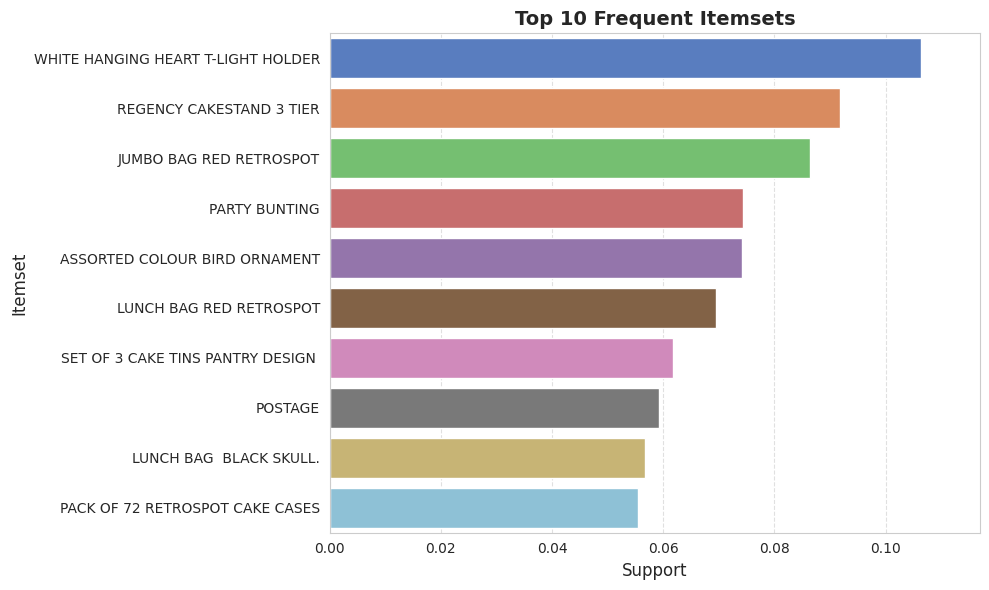

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [51]:
# Take top 10 frequent itemsets by support
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

# Convert frozensets to strings for plotting
top_itemsets['itemset_str'] = top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='support', y='itemset_str', data=top_itemsets, palette='muted')
plt.xlabel('Support', fontsize=12)
plt.ylabel('Itemset', fontsize=12)
plt.title('Top 10 Frequent Itemsets', fontsize=14, fontweight='bold')
plt.xlim(0, top_itemsets['support'].max()*1.1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag